## Name: Sougata Sen
### Reg: 24-27-37
### Course: M.Tech in Data Science

1. Write a function that takes input (x,y) and returns MLE theta using Normal Equation.
Use numpy in python to implement. Create a feature set x using linspace or np.random
function and target values y. Call the function by passing these arguments and plot the
precited values against input data.


Theta: 
 [[7.65971025]
 [6.20206104]]


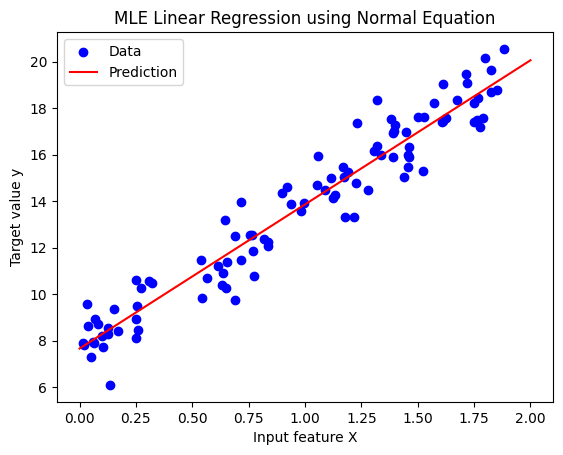

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def mle_theta(X, y):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    X_t = X.T
    theta = np.linalg.inv(X_t.dot(X)).dot(X_t).dot(y)
    return theta

X = 2 * np.random.rand(100, 1)
y = 8 + 6 * X + np.random.randn(100, 1)
theta_mle = mle_theta(X, y)
print("Theta: \n",theta_mle)

X_new = np.array([[0], [2]])  
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add intercept term
y_predict = X_new_b.dot(theta_mle)
plt.scatter(X, y, color='blue', label="Data")
plt.plot(X_new, y_predict, color='red', label="Prediction")
plt.xlabel("Input feature X")
plt.ylabel("Target value y")
plt.title("MLE Linear Regression using Normal Equation")
plt.legend()
plt.show()


2. Write a program to implement polynomial regression and compare it with the result
obtained in the last question by plotting both the hypothesis.

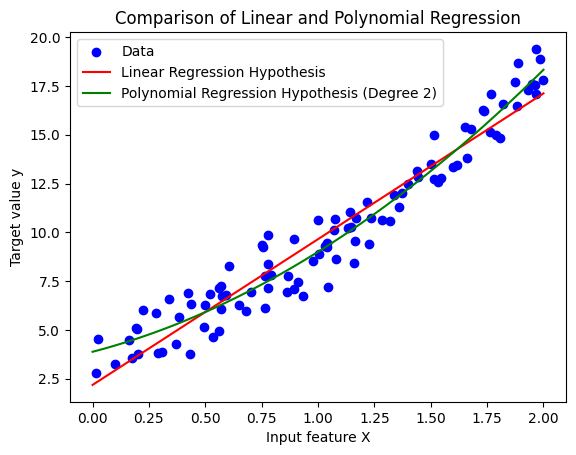

In [12]:
def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], degree))  # Initialize matrix with ones for the intercept term
    for d in range(1, degree + 1):
        X_poly[:, d-1] = X.ravel() ** d
    return X_poly

# Polynomial regression (degree 2)
degree = 2
X_poly = polynomial_features(X, degree)  # Manually create polynomial features
theta_poly = mle_theta(X_poly, y)  # Compute theta using normal equation on polynomial features

X_range = np.linspace(0, 2, 200).reshape(-1, 1)
X_range_poly = polynomial_features(X_range, degree)
X_range_poly_b = np.c_[np.ones((X_range_poly.shape[0], 1)), X_range_poly]  # Add intercept
y_range_poly = X_range_poly_b.dot(theta_poly)

# Plotting
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_new, y_predict_linear, color="red", label="Linear Regression Hypothesis")
plt.plot(X_range, y_range_poly, color="green", label="Polynomial Regression Hypothesis (Degree 2)")
plt.xlabel("Input feature X")
plt.ylabel("Target value y")
plt.title("Comparison of Linear and Polynomial Regression")
plt.legend()
plt.show()

3. Access the effects of outliers while training a linear regression by introducing some outliers in the data. Propose a solution how these outliers can be detected and removed
before training the model. Implement the solution in python.

We can introduce outliers explicitly by appending some outlier data into the training data.
Then I have used a function to detect outlier using z score normalization and keeping the threshold value to be 3 by default. If the z score normalization is more than the threshold value then they are classified as outliers and are ignored.

$$
Z normalization : \frac{(x - mean)}{standard deviation}
$$

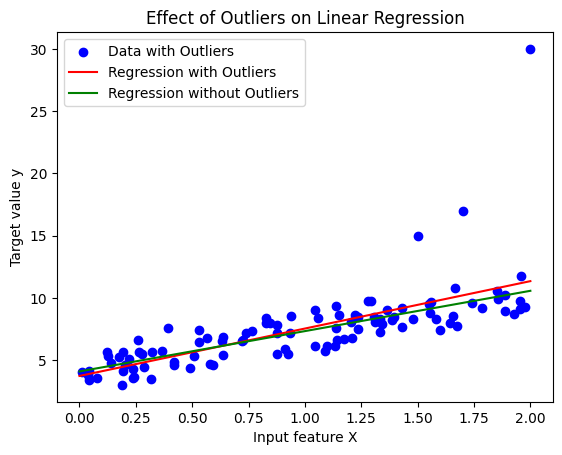

In [14]:
# Introduce outliers
X_outliers = np.append(X, [[1.5], [1.7], [2.0]], axis=0)
y_outliers = np.append(y, [[15], [17], [30]], axis=0)  # Large values as outliers

# Function to detect outliers using Z-score
def detect_outliers(X, y, threshold=3):
    # Calculate mean and standard deviation
    mean_y = np.mean(y)
    std_y = np.std(y)
    
    # Calculate Z-scores
    z_scores = np.abs((y - mean_y) / std_y)
    
    # Identify indices of outliers
    non_outliers = z_scores < threshold
    return X[non_outliers.ravel()], y[non_outliers.ravel()]

# Remove outliers
X_clean, y_clean = detect_outliers(X_outliers, y_outliers)

# Train models
theta_with_outliers = mle_theta(X_outliers, y_outliers)
theta_without_outliers = mle_theta(X_clean, y_clean)

# Generate predictions
X_range = np.linspace(0, 2, 200).reshape(-1, 1)
X_range_b = np.c_[np.ones((X_range.shape[0], 1)), X_range]  # Add intercept term

y_predict_with_outliers = X_range_b.dot(theta_with_outliers)
y_predict_without_outliers = X_range_b.dot(theta_without_outliers)

# Plotting
plt.scatter(X_outliers, y_outliers, color="blue", label="Data with Outliers")
plt.plot(X_range, y_predict_with_outliers, color="red", label="Regression with Outliers")
plt.plot(X_range, y_predict_without_outliers, color="green", label="Regression without Outliers")
plt.xlabel("Input feature X")
plt.ylabel("Target value y")
plt.title("Effect of Outliers on Linear Regression")
plt.legend()
plt.show()